In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow_hub as hub
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
path_to_data = "./image_dataset/"

In [3]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [4]:
img_dirs

['./image_dataset/cristiano_ronaldo',
 './image_dataset/ibrahimovic',
 './image_dataset/lionel_messi',
 './image_dataset/mbappe',
 './image_dataset/neymar']

In [5]:
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [6]:
SIZE = 200
for name,values in celebrity_file_names_dict.items():
    si = SIZE - len(values)
    celebrity_file_names_dict[name] += celebrity_file_names_dict[name][:si]

In [9]:
for name in class_dict.keys():
    print(len(celebrity_file_names_dict[name]))

200
200
200
200
200


In [8]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'ibrahimovic': 1,
 'lionel_messi': 2,
 'mbappe': 3,
 'neymar': 4}

In [10]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        img = cv2.resize(img, (300, 300))
        X.append(img)
        y.append(class_dict[celebrity_name])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X.shape

(1000, 300, 300, 3)

In [13]:
X[0]

array([[[ 18,  20,   1],
        [ 18,  20,   1],
        [ 18,  20,   1],
        ...,
        [ 38,  31,  52],
        [ 38,  31,  51],
        [ 37,  31,  48]],

       [[ 18,  20,   1],
        [ 18,  20,   1],
        [ 18,  20,   1],
        ...,
        [ 38,  31,  52],
        [ 38,  31,  51],
        [ 37,  31,  48]],

       [[ 18,  20,   1],
        [ 18,  20,   1],
        [ 18,  20,   1],
        ...,
        [ 38,  31,  52],
        [ 38,  31,  51],
        [ 37,  31,  48]],

       ...,

       [[127, 174, 136],
        [127, 174, 136],
        [127, 174, 136],
        ...,
        [ 17,  26,  25],
        [ 18,  27,  26],
        [ 32,  44,  44]],

       [[128, 175, 137],
        [128, 175, 137],
        [128, 175, 137],
        ...,
        [ 17,  25,  24],
        [ 18,  27,  26],
        [ 31,  43,  43]],

       [[128, 175, 137],
        [128, 175, 137],
        [128, 175, 137],
        ...,
        [ 17,  25,  24],
        [ 16,  24,  23],
        [ 15,  27,  27]]

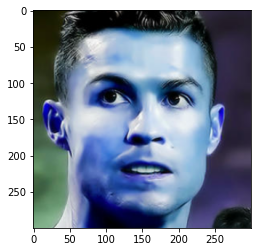

In [14]:
plt.imshow(X[0])

In [15]:
y[0]

0

In [16]:
X = X/255

In [17]:
X[0]

array([[[0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        ...,
        [0.14901961, 0.12156863, 0.20392157],
        [0.14901961, 0.12156863, 0.2       ],
        [0.14509804, 0.12156863, 0.18823529]],

       [[0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        ...,
        [0.14901961, 0.12156863, 0.20392157],
        [0.14901961, 0.12156863, 0.2       ],
        [0.14509804, 0.12156863, 0.18823529]],

       [[0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        ...,
        [0.14901961, 0.12156863, 0.20392157],
        [0.14901961, 0.12156863, 0.2       ],
        [0.14509804, 0.12156863, 0.18823529]],

       ...,

       [[0.49803922, 0.68235294, 0.53333333],
        [0.49803922, 0.68235294, 0.53333333],
        [0.49803922, 0

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify=y)

In [19]:
len(X_train),len(X_test)

(800, 200)

In [20]:
feature_extracted_model = "https://tfhub.dev/google/efficientnet/b3/feature-vector/1"
pre_trained_model = hub.KerasLayer( feature_extracted_model, input_shape=(300,300,3),trainable=False)

In [21]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(300,300,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [22]:
num_of_footballers = 5

model = keras.Sequential([
    data_augmentation,
    pre_trained_model,
    keras.layers.Dense(num_of_footballers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 300, 300, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1536)              10783528  
_________________________________________________________________
dense (Dense)                (None, 5)                 7685      
Total params: 10,791,213
Trainable params: 7,685
Non-trainable params: 10,783,528
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 257s 7s/step - loss: 1.4899 - accuracy: 0.3688
Epoch 2/15
25/25 [==============================] - 179s 7s/step - loss: 1.1765 - accuracy: 0.6225
Epoch 3/15
25/25 [==============================] - 177s 7s/step - loss: 1.0164 - accuracy: 0.6875
Epoch 4/15
25/25 [==============================] - 176s 7s/step - loss: 0.8745 - accuracy: 0.7563
Epoch 5/15
25/25 [==============================] - 180s 7s/step - loss: 0.7924 - accuracy: 0.7862
Epoch 6/15
25/25 [==============================] - 179s 7s/step - loss: 0.7193 - accuracy: 0.8150
Epoch 7/15
25/25 [==============================] - 177s 7s/step - loss: 0.6557 - accuracy: 0.8425
Epoch 8/15
25/25 [==============================] - 180s 7s/step - loss: 0.6077 - accuracy: 0.8487
Epoch 9/15
25/25 [==============================] - 180s 7s/step - loss: 0.5846 - accuracy: 0.8650
Epoch 10/15
25/25 [==============================] - 177s 7s/step - loss: 0.5374 - accuracy: 0.8863
Epoch 11/

In [24]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 51s 6s/step - loss: 0.4509 - accuracy: 0.8750


[0.45088431239128113, 0.875]

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred[:5]

array([[ 0.8745208 ,  0.14628771, -1.5964155 ,  0.7548898 , -1.8541927 ],
       [ 0.2666118 ,  2.2305417 , -0.84220797, -2.1314414 , -1.1337819 ],
       [ 1.6037575 , -3.1629264 , -1.3162796 ,  1.8647648 ,  0.71624047],
       [ 1.9254674 , -0.62337434, -0.68371254, -0.6204481 ,  0.9420787 ],
       [-1.9575205 , -1.5055828 , -0.47479177,  1.9148539 ,  1.4281523 ]],
      dtype=float32)

In [27]:
y_preds = [np.argmax(i) for i in y_pred]
y_preds[:5]

[0, 1, 3, 0, 3]

In [28]:
y_test[:5]

array([0, 1, 3, 0, 3])

In [29]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.85      0.85      0.85        40
           2       0.94      0.85      0.89        40
           3       0.87      0.97      0.92        40
           4       0.94      0.82      0.88        40

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [30]:
class_labels = ['Ronaldo','Ibrahimovic','Messi','Mbappe','Neymar']

In [31]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [32]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        return roi_color

In [33]:
def predicting(img_path):
    image = get_cropped_image_if_2_eyes(img_path)
    image = cv2.resize(image, (300,300))
    plt.axis('off')
    plt.imshow(image)
    image = image / 255
    pre = np.argmax(model.predict(np.array([image])))
    print(f"You look like {class_labels[pre]}")

You look like Messi


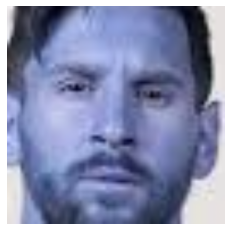

In [34]:
predicting('./messi_test.jpg')

You look like Ronaldo


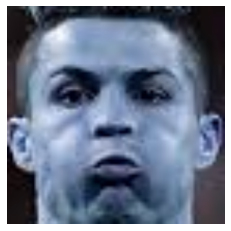

In [35]:
predicting('./cr7_test.jpg')

You look like Neymar


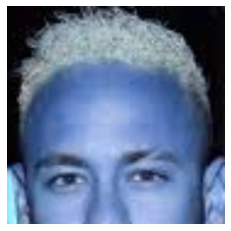

In [36]:
predicting('./neymar_test.jpg')

You look like Mbappe


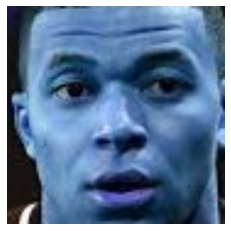

In [37]:
predicting('./mbappe_test.jpg')

You look like Ibrahimovic


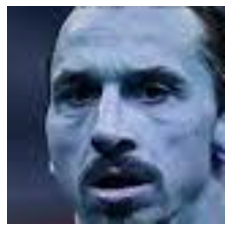

In [38]:
predicting('./ibrahimovic_test.jpg')